In [ ]:
#Red Neuronal Convolucional aplicadas en
#CFAR10

import keras
from keras.datasets import cifar10
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten


Dimensiones de train_images: (50000, 32, 32, 3)
Dimensiones de train_labels: (50000, 1)
Dimensiones de test_images: (10000, 32, 32, 3)
Dimensiones de test_labels: (10000, 1)


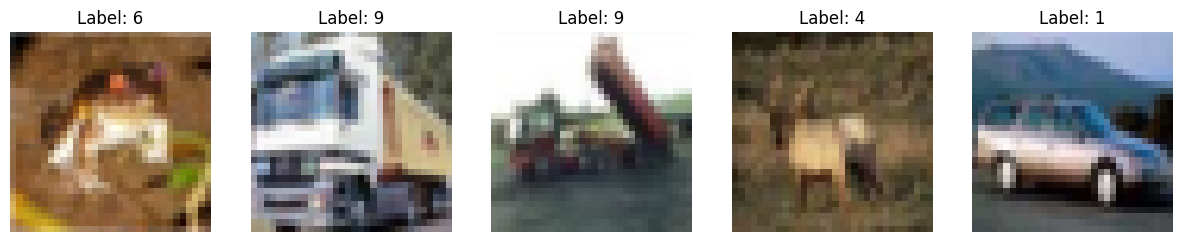

In [ ]:
#Cargue la división de entrenamiento y prueba del conjunto de datos CIFAR10 Y CIFAR100
(training_images, training_labels), (test_images, test_labels) = cifar10.load_data()

# Verificar las dimensiones de los datos
print("Dimensiones de train_images:", training_images.shape)
print("Dimensiones de train_labels:", training_labels.shape)
print("Dimensiones de test_images:", test_images.shape)
print("Dimensiones de test_labels:", test_labels.shape)

# Mostrar algunas imágenes del conjunto de datos
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axes[i].imshow(training_images[i])
    axes[i].set_title(f"Label: {training_labels[i][0]}")
    axes[i].axis('off')
plt.show()

In [ ]:
# Normalizar las imágenes
training_images = training_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Convertir etiquetas a formato one-hot
training_labels = keras.utils.to_categorical(training_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

In [ ]:
#Construcción del modelo
#Construir el modelo de clasificación

# Definir el modelo
model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [ ]:
#Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
1563/1563 [==============================] - 65s 40ms/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 2.3028 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 59s 38ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 62s 40ms/step - loss: 2.3028 - accuracy: 0.0970 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 62s 39ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3026 -

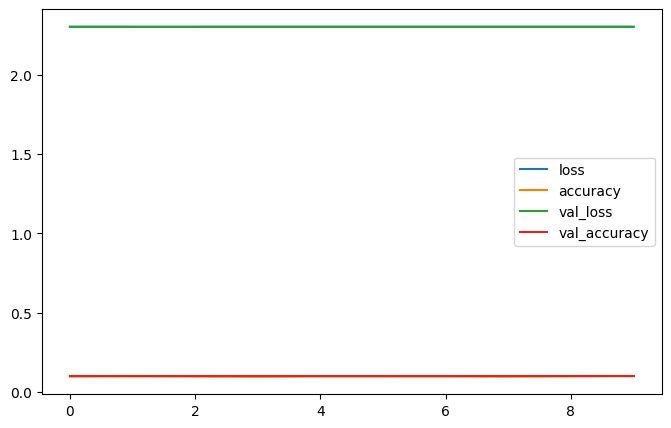

In [ ]:
# Entrenar el modelo
history = model.fit(training_images, training_labels, epochs=10, validation_data=(test_images, test_labels))

#Graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.show()

In [ ]:
#Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(training_images, training_labels)
print("Pérdida en el conjunto de entrenamiento:", loss)
print("Precisión en el conjunto de entrenamiento:", accuracy)

#Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print("Pérdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)


1563/1563 [==============================] - 20s 13ms/step - loss: 2.3026 - accuracy: 0.1000
Pérdida en el conjunto de entrenamiento: 2.3026492595672607
Precisión en el conjunto de entrenamiento: 0.10000000149011612
313/313 [==============================] - 3s 11ms/step - loss: 2.3027 - accuracy: 0.1000
Pérdida en el conjunto de prueba: 2.3026511669158936
Precisión en el conjunto de prueba: 0.10000000149011612


In [ ]:
#Predicción
index = 1
print(f'Label: {test_labels[index]}')
classification = model.predict(test_images[index:index+1])
print(f'Classification:\n {classification.reshape(-1,1)}')
#plt.imshow(test_images[index])
#plt.show()

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1/1 [==============================] - 0s 114ms/step
Classification:
 [[0.1003398 ]
 [0.10017727]
 [0.09935111]
 [0.10073307]
 [0.10137318]
 [0.09966625]
 [0.09758294]
 [0.10185149]
 [0.09962076]
 [0.09930421]]


In [ ]:
#Después de realizar el entrenamiento vamos a ejecutar un código que permite
#Visualizar las convoluciones y Pooling

#Preparación de los datos
print(test_labels[:30])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [ ]:
#Selección de imágenes de interés

FIRST_IMAGE=3
SECOND_IMAGE=10
THIRD_IMAGE=25

print(f'Label: {test_labels[FIRST_IMAGE]}')
print(f'Label: {test_labels[SECOND_IMAGE]}')
print(f'Label: {test_labels[THIRD_IMAGE]}')

Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


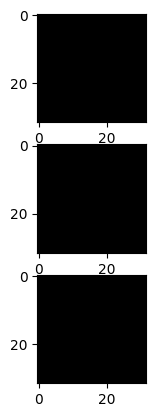

In [ ]:
#Visualización de imágenes
f, axarr = plt.subplots(3,1)
axarr[0].imshow(test_images[FIRST_IMAGE])
axarr[1].imshow(test_images[SECOND_IMAGE])
axarr[2].imshow(test_images[THIRD_IMAGE])


In [ ]:
#Extracción de activaciones

layer = 0
filter1 = 0
filter2 = 10

layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)


1/1 [==============================] - 0s 29ms/step


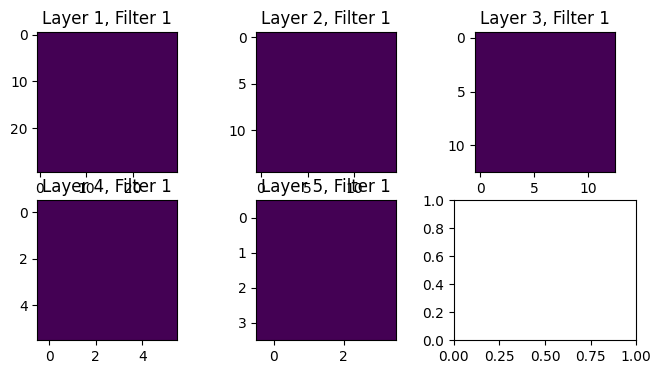

In [ ]:
# Mostrar las activaciones para la primera imagen del conjunto de prueba
FIRST_IMAGE = 0
test_image = test_images[FIRST_IMAGE].reshape(1, 32, 32, 3)  # Ajustar el tamaño correctamente
activations = activation_model.predict(test_image)

# Graficar las activaciones
fig, axarr = plt.subplots(2, 3, figsize=(8, 4))
axarr[0, 0].set_title('Image Input')
axarr[0, 0].imshow(test_images[FIRST_IMAGE])
for i in range(1, 6):
    f1 = activations[i-1][0, :, :, 0]  # Tomar el primer filtro de la capa
    axarr[(i-1)//3, (i-1)%3].set_title(f'Layer {i}, Filter 1')
    axarr[(i-1)//3, (i-1)%3].imshow(f1, cmap='viridis')
plt.show()


Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1/1 [==============================] - 0s 26ms/step


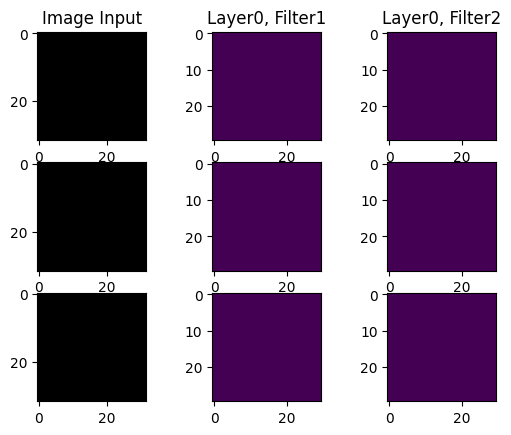

In [ ]:
#seleccionando elementos etiquetados como 7 tenemos

FIRST_IMAGE=2
SECOND_IMAGE=5
THIRD_IMAGE=14

print(f'Label: {test_labels[FIRST_IMAGE]}')
print(f'Label: {test_labels[SECOND_IMAGE]}')
print(f'Label: {test_labels[THIRD_IMAGE]}')

f, axarr = plt.subplots(3,3)

axarr[0,0].set_title('Image Input')
axarr[0,0].imshow(test_images[FIRST_IMAGE])
f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 32, 32, 3))[layer]
axarr[0,1].set_title('Layer' + str(layer)+ ', Filter1')
axarr[0,1].imshow(f1[0,:,:,filter1])
axarr[0,2].set_title('Layer' + str(layer)+ ', Filter2')
axarr[0,2].imshow(f1[0,:,:,filter2])

axarr[1,0].imshow(test_images[SECOND_IMAGE])
f2= activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 32, 32, 3))[layer]
axarr[1,1].imshow(f2[0,:,:,filter1])
axarr[1,2].imshow(f2[0,:,:,filter2])

axarr[2,0].imshow(test_images[THIRD_IMAGE])
f3= activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 32, 32, 3))[layer]
axarr[2,1].imshow(f3[0,:,:,filter1])
axarr[2,2].imshow(f3[0,:,:,filter2])